# Time series vs. cross-section

- sample of households at a point in time (income, expenditure)  
- aggregate (income, expenditure) over time
- dependent vs. independent sampling

$$\begin{bmatrix}Z_1\\Z_2\\Z_3\\\vdots\\Z_K\end{bmatrix} $$

* $Z_i$ can be a scalar, or a vector, e.g. $$Z_i = \begin{bmatrix}y_i\\X_i\end{bmatrix} $$

$$ Z \sim \mathcal{N}(\mu, \Sigma) $$

$$\begin{bmatrix}Z_1\\Z_2\\Z_3\\\vdots\\Z_K\end{bmatrix} 
\sim \mathcal{N} \left(
\begin{bmatrix}\mu_1\\\mu_2\\\mu_3\\\vdots\\\mu_K\end{bmatrix},
\begin{pmatrix}
\Sigma(1,1) & \Sigma(1,2) & \Sigma(1,3) & \cdots & \Sigma(1,K)\\
\Sigma(2,1) & \Sigma(2,2) & \Sigma(2,3) & \cdots &  \vdots\\
\Sigma(3,1) & \Sigma(3,2) & \Sigma(3,3) & \cdots &  \vdots\\
\vdots & \vdots & \vdots & \cdots &  \vdots\\
\Sigma(K,1) & \cdots & \cdots  & \cdots & \Sigma(K,K)\\
\end{pmatrix}
\right)
$$

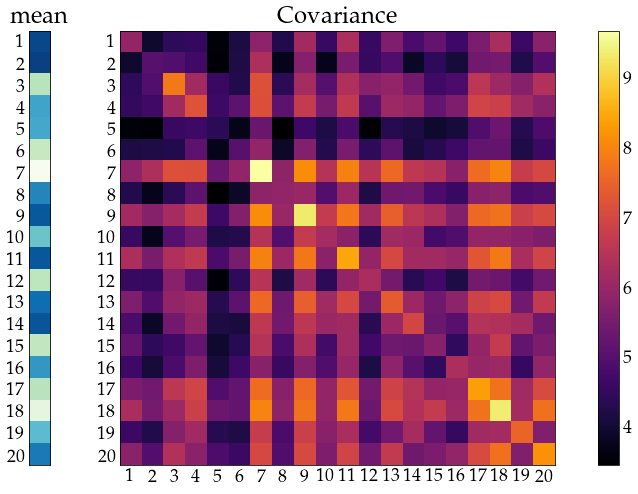

In [52]:
show_covariance(mean_vec=unrestr_mean, cov_mat=unrestr_cov)

remember: symmetry of $\Sigma$

### Hopeless without resrtictions - structure on $\mu, ~\Sigma$

* independent

$$\begin{bmatrix}Z_1\\Z_2\\Z_3\\\vdots\\Z_K\end{bmatrix} 
\sim \mathcal{N} \left(
\begin{bmatrix}\mu_1\\\mu_2\\\mu_3\\\vdots\\\mu_K\end{bmatrix},
\begin{pmatrix}
\Sigma(1,1) & 0 & 0 & \cdots & 0\\
0 & \Sigma(2,2) & 0 & \cdots &  \vdots\\
0 & 0 & \Sigma(3,3) & \cdots &  \vdots\\
\vdots & \vdots & \vdots & \cdots &  \vdots\\
0 & \cdots & \cdots  & \cdots & \Sigma(K,K)\\
\end{pmatrix}
\right)
$$

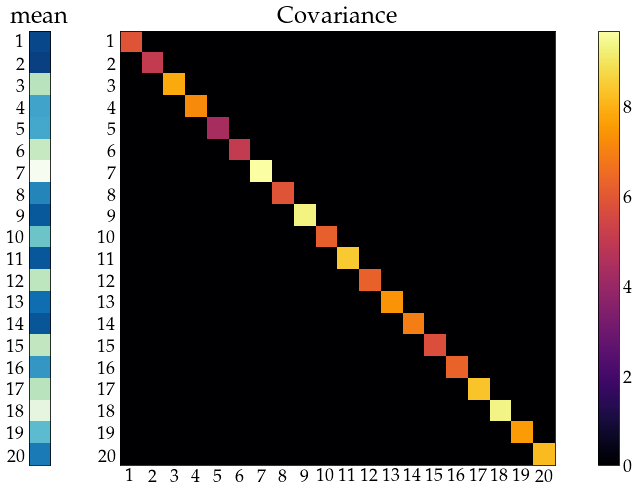

In [53]:
show_covariance(mean_vec=unrestr_mean, cov_mat=np.diagflat(unrestr_cov.diagonal()))

* ... and identically distributed

$$\begin{bmatrix}Z_1\\Z_2\\Z_3\\\vdots\\Z_K\end{bmatrix} 
\sim \mathcal{N} \left(
\begin{bmatrix}\mu\\\mu\\\mu\\\vdots\\\mu\end{bmatrix},
\begin{pmatrix}
\Sigma & 0 & 0 & \cdots & 0\\
0 & \Sigma & 0 & \cdots &  \vdots\\
0 & 0 & \Sigma & \cdots &  \vdots\\
\vdots & \vdots & \vdots & \cdots &  \vdots\\
0 & \cdots & \cdots  & \cdots & \Sigma\\
\end{pmatrix}
\right)
$$

Note: small $\mu$ and $\Sigma$ - not the moments of full joint distribution above

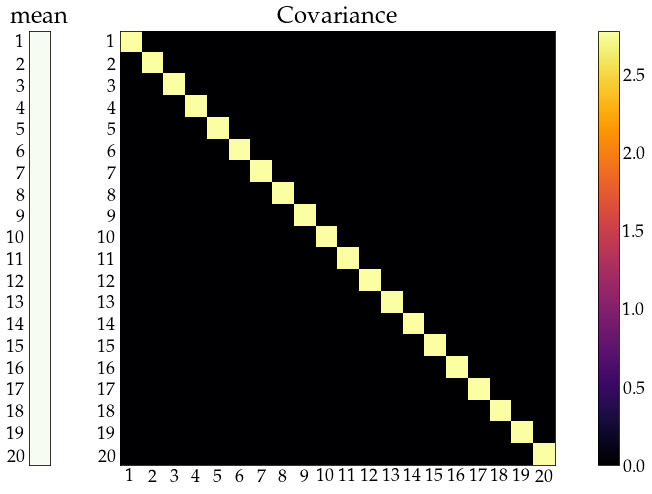

In [54]:
show_covariance(mean_vec=np.ones((n_obs, 1)) ,cov_mat=np.diagflat(Sigma.diagonal()));

## time series

* distribution ($\mu$, and $\Sigma$) is time-invariant (**_stationarity_**)

* dependence - not too strong and weaker for distant elements (**_ergodicity_**)

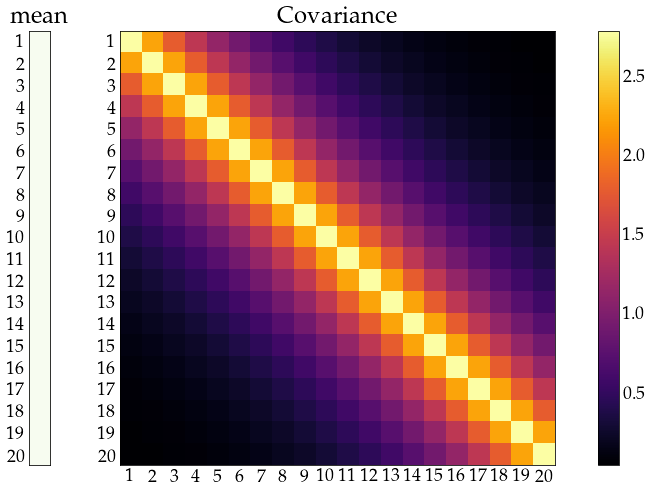

In [56]:
show_covariance(mean_vec=np.ones((n_obs, 1)) ,cov_mat=Sigma);

## time series models

* represent temporal dependence in a parsimonious way

  - AR (1) model: 
  $$z_t = \alpha z_{t-1} + \varepsilon_t$$
  
  - MA(1) model:
   $$z_t = \varepsilon_t + \psi \varepsilon_{t-1}$$
   
  - ARMA(1,1) model:
   $$z_t = \alpha z_{t-1} + \varepsilon_t + \psi \varepsilon_{t-1}$$
   
  - etc.
   
* represent temporal interdependence among multiple variables in a parsimonious way

  - VAR (1) model
  - VMA(1) model  
  - VARMA(1,1) model
  - etc.

## Consequence of dependence

* information accumulates more slowly - need different statistical theory to justify methods

* forecast the future using the past